# K-Means Clustering

Thoughout this lab we'll be using [K-Means clustering](https://en.wikipedia.org/wiki/K-means_clustering) on a dataset to divide it into clusters, and analyze its results.
K-Means clustering is an unsupervised learning methodology, which means there is no target output we are trying to be predict.  Instead, it utilizes a _classification algorithm_, which automatically divides a large group of data into smaller groups, called _clusters_.  
The goal of clustering is to maximize the similarity between points within a cluster (by minimizing a measure of distance between the points) while also maximizing the difference between clusters.
This allows for the best separation of the different groups.  
The **K** in K-Means references the number of clusters to be created from the data, and the optimal value of k varies depending on the data and the problem being solved.  It is often a good idea to try several different values of k when using K-Means Clustering.  
The **Means** in K-Means refers to the [centroid](https://en.wikipedia.org/wiki/Centroid) or mean point of each of the `k` clusters.  

The data used in this lab are results from [pulmonary lung function tests](https://en.wikipedia.org/wiki/Pulmonary_function_testing) for the fathers, mothers and the oldest children.  
Throughout the lab, you will cluster the data into categories based on [Forced Expiratory Volume in 1 second (FEV1)](https://en.wikipedia.org/wiki/Spirometry#Forced_expiratory_volume_in_1_second_(FEV1)) and [Forced Vital Capacity (FVC)](https://en.wikipedia.org/wiki/Spirometry#Forced_vital_capacity_(FVC)).  
Do not stress if you are unaware of the tests parameters.  
It's recommended that you look into the CSV file before-hand to better understand the befores and afters of the data manipulation.  
Within this dataset, each row corrisponds to a family.  
Thus, the CSV columns prepended with an **F** refer to the _father_, the **M** is for the _mother_, and the **C** is for the _oldest child_.
This works fine for data output, but we'll need to do some manipulation beforehand to make it easier to work with, which we'll cover in a moment.  

Before diving in, let's chat about some of the tools we'll be using throughout this lab.

- **[pandas](https://pandas.pydata.org/)**: a fast and powerful data analysis and manipulation tool.
- **[scikit-learn](https://scikit-learn.org/stable/)**: machine learning framework in python.
- **[matplotlib](https://matplotlib.org/)**: data visualizations with python.

Using `pip` we can install these dependencies, and `import` all the necesasry libraries we'll need of this exercise.

In [1]:
! pip install pandas sklearn matplotlib
# import required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Reading in the Data

We'll use the `pandas` library to load in our data.
We can get an idea of data using the `sample` function to display a random set from our data.


Import the data into a pandas data frame by using the `read_csv` function. 

In [2]:
# read in data from file
data = pd.read_csv('./data_files/lab12/lung_functions.csv')
data.sample(10)

,ID,AREA,FSEX,FAGE,FHEIGHT,FWEIGHT,FFVC,FFEV1,MSEX,MAGE,MHEIGHT,MWEIGHT,MFVC,MFEV1,CSEX,CAGE,CHEIGHT,CWEIGHT,CFVC,CFEV1
55,56,2,1,59,73,180,512,410,2,56,67,138,418,321,2,17,69,131,463,429
73,74,3,1,51,73,158,657,499,2,47,66,116,404,333,1,17,72,163,604,521
65,66,2,1,39,66,188,488,390,2,32,62,124,257,206,1,10,49,50,107,98
24,25,2,1,39,67,151,458,377,2,34,64,176,418,351,1,17,71,164,567,449
88,89,3,1,41,73,213,434,362,2,40,67,170,370,305,2,13,64,108,314,289
93,94,4,1,43,67,171,410,327,2,41,66,260,349,289,2,9,52,66,185,160
75,76,3,1,46,69,192,407,343,2,48,67,205,325,283,2,16,67,142,326,301
22,23,1,1,51,73,215,499,416,2,49,63,122,299,294,1,17,70,180,496,436
145,146,4,1,53,69,162,441,340,2,50,65,147,279,245,2,17,66,127,360,347
31,32,2,1,43,70,196,470,413,2,44,67,145,411,328,2,17,66,139,366,282


With the data loaded into a pandas data frame, we can now reformat the data so that the same variables for mothers, fathers and oldest children are in the same columns.
We will also add in a _Category_ field to show who the original data represented, and update the `ID` column by appending a letter to the original id value to uniquely identify the data point.

In [3]:
# parse data so father, mother and child stats are in the same columns with a category label to indicate family member
father = data[['ID','AREA','FSEX','FAGE','FHEIGHT','FWEIGHT','FFVC','FFEV1']].copy()
father.columns = ['ID','Area','Sex','Age','Height','Weight','FVC','FEV1']
father['ID'] = [''.join(['F',str(id)]) for id in father['ID']]
father['Category'] = 'Father'

mother = data[['ID','AREA','MSEX','MAGE','MHEIGHT','MWEIGHT','MFVC','MFEV1']].copy()
mother.columns = ['ID','Area','Sex','Age','Height','Weight','FVC','FEV1']
mother['ID'] = [''.join(['M',str(id)]) for id in mother['ID']]
mother['Category'] = 'Mother'

child = data[['ID','AREA','CSEX','CAGE','CHEIGHT','CWEIGHT','CFVC','CFEV1']].copy()
child.columns = ['ID','Area','Sex','Age','Height','Weight','FVC','FEV1']
child['ID'] = [''.join(['C',str(id)]) for id in child['ID']]
child['Category'] = 'Child'

With the data reorganized, we can use `pandas` again to merge it into a new dataset.
To get an idea of what we're looking at, let's display the first 10 rows.

In [4]:
# create new dataset from the cleaned lists above
clean_data = pd.concat([father,mother,child],axis=0)

# display a random set from the data
clean_data.sample(10)

,ID,Area,Sex,Age,Height,Weight,FVC,FEV1,Category
84,M85,3,2,41,69,145,447,331,Mother
29,F30,2,1,39,68,209,417,362,Father
128,M129,4,2,30,68,194,442,375,Mother
137,C138,4,2,10,58,72,198,177,Child
135,M136,4,2,30,64,124,371,329,Mother
132,F133,4,1,32,70,167,592,485,Father
37,F38,2,1,35,69,184,400,350,Father
47,C48,2,1,16,72,141,527,431,Child
48,C49,2,2,15,66,128,353,314,Child
3,M4,1,2,36,58,123,265,206,Mother


Before moving on to the next section, be sure to compare the before and after of the sample data.

### Normalization

Why normalize this dataset instead of using it how it is?
This is best practice for algorithms that utilize a distance measure, such as the algorithm that implements K-Means clustering. 
By normalizing our data before calculating the distances between points, we prevent one feature with a much larger scale from dominating the distance calculation.  
For this problem, [min/max normalization](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)) is used.
This rescales each feature to values between 0 and 1 (inclusive).
To achieve this, we can use the `sklearn.preprocessing.MinMaxScaler` function (imported earlier).

In [6]:
# scale the data using min/max normalization
minmax = MinMaxScaler()
scaled_data = minmax.fit_transform(clean_data[['FEV1','FVC']])

## Clustering

The clustering is implemented using the `sklearn.cluster.KMeans` function from the scikit-learn package (imported earlier).  
The choice of `k` is a [hyperparameter](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) that needs to be tuned outside the model optimization.
For our purposes, `k=3` is chosen.
This was chosen because the number of data points in each category will be examined for each cluster.
Since there are 3 categories (fathers, mothers and oldest children), `k=3` is chosen to see if the clusters could approximately recreate these categories.

**NOTE**: While we went ahead and assigned `k=3`, it is generally good practice to try several values for `k` to see what interesting groupings are created by clustering.

In [7]:
# specify number of clusters
k = 3

# ensures that the state of clustering remains the
# same with each execution. ensures consistant results
# within this lab
consistant_randomness = 42

# run the algorithm
kmeans = KMeans(n_clusters=k, random_state=consistant_randomness)

# group data into clusters
kmeans.fit(scaled_data)

# labels for each data point
clusters = kmeans.labels_

# centroids for each cluster
centroids = minmax.inverse_transform(kmeans.cluster_centers_)

We've successfully applied K-Means clustering to our data!
However, a dataset in python is not very appealing.
Let's plot out our dataset to get a better understand through some visualizations.  We will do this using the `matplotlib` package.

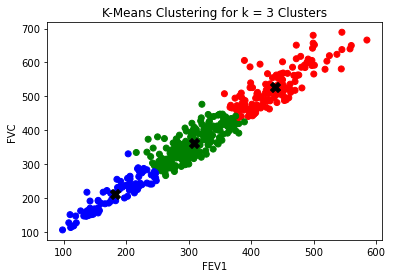

In [22]:
# define colors for each cluster
colors = ['red', 'blue', 'green', 'black'] # more colors if k > 4

# initialize the graph
fig, ax = plt.subplots()

ax.scatter(x=clean_data['FEV1'], y=clean_data['FVC'], c=[colors[cluster] for cluster in clusters])
ax.scatter(x=centroids[:,0], y=centroids[:,1], c='black', marker='X', s=100)

# set graph labels
ax.set_xlabel('FEV1')
ax.set_ylabel('FVC')
ax.set_title('K-Means Clustering for k = {} Clusters'.format(k))

# display the graph
plt.show()

Lovely isn't it?
Notice the black **X** at the center of each cluster.
These are the centroids mentioned earlier.

**Exercise**: Plotting a new point on the graph.

Before running the code, try to answer to the following:

- Which cluster will your result be in?
- Out of the three categories, which should it be assigned to?

Pseudo code is below, try changing the `x` and `y` values in the interactive section.
```python
x, y = 300, 350

# new point coordinates on the original scales
new_point = [[x,y]]

# scale the values
scaled_point = minmax.transform(new_point)

# assign the new point to a cluster
assigned_cluster = kmeans.predict(scaled_point)
print('The new point is in the {:s} cluster.'.format(colors[assigned_cluster[0]]))
```

Give it a go.

In [28]:
x, y = 0, 0

# new point coordinates on the original scales
new_point = [[x,y]]

# scale the values
scaled_point = minmax.transform(new_point)

# assign the new point to a cluster
assigned_cluster = kmeans.predict(scaled_point)
print('The new point is in the {} cluster.'.format(colors[assigned_cluster[0]]))

The new point is in the green cluster.


## Examining the Outcome

Once the clusters have been created, the details of the members of each cluster can be explored to look for similarities in the groupings.

For this example, the number of data points in each category will be examined for each cluster.  Since there are 3 categories (fathers, mothers and oldest children), this is why k = 3 was selected (to see if the clusters could approximately recreate these categories).

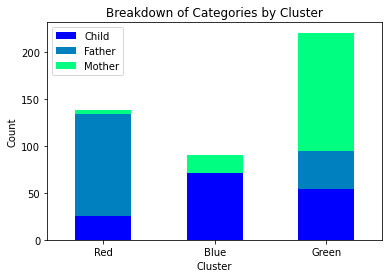

In [29]:
# data for plotting
clean_data['Cluster'] = clusters
plot_data = clean_data.groupby(['Category','Cluster']).size().reset_index()
plot_data.rename(columns={0:'Count'}, inplace=True)

# create stacked bar chart
pivot = plot_data.pivot(index='Cluster', columns='Category', values='Count')
pivot.plot.bar(stacked=True, cmap='winter')
plt.xticks(range(0,k), 
           [colors[i].capitalize() for i in pivot.index], 
           rotation='horizontal')
plt.ylabel('Count')
plt.title('Breakdown of Categories by Cluster')
plt.legend()

# display graph
plt.show()

While the clusters aren't a perfect breakdown between the categories, they make sense as height is strongly correlated with FEV1 and FVC.
People who are taller have larger values for both features.
Thus, men (fathers) would tend to have the highest values, as seen in the red cluster, while children would have the lowest values, as seen in the blue cluster, which has some overlap with the presumably shortest mothers but no adult men.
The second cluster (the middle green cluster) has all three groups but is dominated by adult women (the mothers).